In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.precision', 3) #data output display settings

In [4]:
berkeley_business = pd.read_csv('berkeley_business_eda.csv')

In [5]:
berkeley_business.head(5)

,APN,MINORITY_OWNED,FEMALE_OWNED,RECORDID,BUSDESC,B1_PER_SUB_TYPE,DBA,NAICS,TAX_CODE,EMPLOYEE_NUM,BUS_OWN_TYPE,B1_STATE,B1_FULL_ADDRESS,B1_SITUS_STATE
0,ZZZZZZZZZZZZZ,Yes,No,BL-000058,PLUMBING CONTRACTOR,Construction or Contractor,BAY PLUMBING & ROOTER,"238220 - Plumbing, Heating, and Air-Conditioni...",C,0.0,Sole Ownership,CA,0 VARIOUS,CA
1,NaN,NaN,NaN,BL-009497,OUT CALL MASSAGE SERVICES,Massage,WILSON ROBIN A,812199 - Other Personal Care Services,BM,1.0,Sole Ownership,CA,0 VARIOUS,CA
2,NaN,NaN,NaN,BL-004830,CONSTRUCTION,Construction or Contractor,VANIR CONSTRUCTORS LLC,236118 - Residential Remodelers,C,0.0,LLC,CA,0 VARIOUS,CA
3,ZZZZZZZZZZZZZ,NaN,NaN,BL-012442,GENERAL CONTRACTOR,Construction or Contractor,FLOW BUILDER,236115 - New Single-Family Housing Constructio...,C,0.0,Sole Ownership,CA,0 VARIOUS,CA
4,NaN,No,No,BL-003956,REPAIR & SELL OFFICE MACHINES,Business Personal Repair Svs,NUANCE COMMUNICATIONS,811212 - Computer and Office Machine Repair an...,B,0.0,Corporation,MA,0 VARIOUS,CA


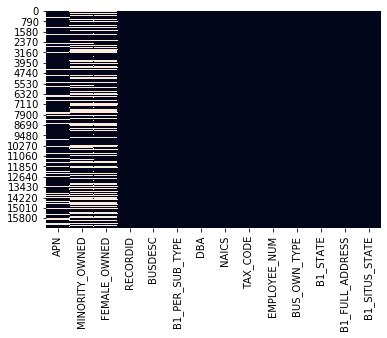

In [7]:
#visualize null entries

sns.heatmap(berkeley_business.isnull(), cbar=False);

### Relationships between columns with null (APN, MINORITY_OWNED, and FEMALE_OWNED)

In [8]:
# number of null APN entries where minority and female owned entries are also null

len(berkeley_business[berkeley_business['APN'].isnull() & berkeley_business['MINORITY_OWNED'].isnull() & berkeley_business['FEMALE_OWNED'].isnull()])

1893

In [9]:
# number of null APN entries where minority and female owned entries are not null
print(len(berkeley_business[berkeley_business['APN'].isnull() & berkeley_business['MINORITY_OWNED'].notnull() & berkeley_business['FEMALE_OWNED'].notnull()]))

print(berkeley_business[berkeley_business['APN'].isnull() & berkeley_business['MINORITY_OWNED'].notnull() & berkeley_business['FEMALE_OWNED'].notnull()]['MINORITY_OWNED'].value_counts())

print(berkeley_business[berkeley_business['APN'].isnull() & berkeley_business['MINORITY_OWNED'].notnull() & berkeley_business['FEMALE_OWNED'].notnull()]['FEMALE_OWNED'].value_counts())


1004
No     808
Yes    196
Name: MINORITY_OWNED, dtype: int64
No     789
Yes    215
Name: FEMALE_OWNED, dtype: int64


In [10]:
# number of null APN entries where minority is null and female is not null

berkeley_business[berkeley_business['APN'].isnull() & berkeley_business['MINORITY_OWNED'].isnull() & berkeley_business['FEMALE_OWNED'].notnull()]['FEMALE_OWNED'].value_counts()

No     13
Yes     6
Name: FEMALE_OWNED, dtype: int64

In [11]:
# number of null APN entries where minority is not null and female is null

print(berkeley_business[berkeley_business['APN'].isnull() & berkeley_business['MINORITY_OWNED'].notnull() & berkeley_business['FEMALE_OWNED'].isnull()]['MINORITY_OWNED'].value_counts())


No     4
Yes    3
Name: MINORITY_OWNED, dtype: int64


In [12]:
print(berkeley_business['MINORITY_OWNED'].value_counts())
print(berkeley_business['FEMALE_OWNED'].value_counts())

No     7099
Yes    2388
Name: MINORITY_OWNED, dtype: int64
No     6359
Yes    3216
Name: FEMALE_OWNED, dtype: int64


### Relationship between APN and other complete (no null) columns

In [22]:
berkeley_business[berkeley_business['APN'].isnull()]['B1_PER_SUB_TYPE'].value_counts()

Construction or Contractor       1556
Professional SemiProfessional     421
Business Personal Repair Svs      264
Rental of Real Property           252
Retail Trade                      200
Non Profit Organizations           79
Entertainment Recreation           51
Manufacturing                      43
Wholesale Trade                    23
Auto Vehicle For Hire              17
Massage                             8
Administrative Headquarters         4
Grocer                              3
Solicitor                           1
Motor Vehicle Sales                 1
Name: B1_PER_SUB_TYPE, dtype: int64

In [15]:
berkeley_business[berkeley_business['APN'].isnull()]['TAX_CODE'].value_counts()

C     1559
P      422
B      259
L      252
R      200
N       79
E       51
M       44
W       23
A       17
BM       8
Q        4
G        3
S        1
V        1
Name: TAX_CODE, dtype: int64

In [23]:
berkeley_business[berkeley_business['APN'].isnull()]['EMPLOYEE_NUM'].value_counts().head(20)

0.0     896
1.0     451
2.0     335
3.0     186
4.0     173
5.0     122
6.0      83
10.0     82
8.0      62
15.0     39
20.0     36
12.0     33
7.0      31
9.0      26
25.0     20
30.0     19
16.0     18
17.0     15
50.0     14
13.0     14
Name: EMPLOYEE_NUM, dtype: int64

In [17]:
berkeley_business[berkeley_business['APN'].isnull()]['BUS_OWN_TYPE'].value_counts()

Corporation       1482
Sole Ownership    1040
LLC                280
Partnership        121
Name: BUS_OWN_TYPE, dtype: int64

In [24]:
berkeley_business[berkeley_business['APN'].isnull()]['B1_FULL_ADDRESS'].value_counts().head(20)

0 VARIOUS                 1981
0   VARIOUS                229
2703 SEVENTH ST              3
2801   ADELINE ST            3
134   BERKELEY SQ            2
2525 EIGHTH ST               2
1440 FOURTH ST B             2
1301   SHATTUCK AVE          2
2300   WARRING ST            2
729   HEINZ AVE              2
919   THE ALAMEDA            2
2310   TELEGRAPH AVE         2
1255 EASTSHORE HWY           2
2369   TELEGRAPH AVE         2
2421   FOURTH ST             2
2915 PINE AVE                2
2213   SAN PABLO AVE A       1
2231 CEDAR ST                1
2739 CHANNING WAY            1
2919 ACTON ST                1
Name: B1_FULL_ADDRESS, dtype: int64

### Relationship between MINORITY_OWNED and other complete (no null) columns

In [27]:
berkeley_business[berkeley_business['MINORITY_OWNED'].isnull()]['B1_PER_SUB_TYPE'].value_counts()

Construction or Contractor       2739
Professional SemiProfessional    1625
Retail Trade                      752
Business Personal Repair Svs      713
Rental of Real Property           653
Entertainment Recreation          197
Non Profit Organizations          172
Manufacturing                      71
Wholesale Trade                    63
Massage                            49
Administrative Headquarters        40
Grocer                              6
Motor Vehicle Sales                 3
Auto Vehicle For Hire               1
Food Vendors                        1
Street Vendors                      1
Name: B1_PER_SUB_TYPE, dtype: int64

In [20]:
berkeley_business.groupby('B1_PER_SUB_TYPE')['MINORITY_OWNED'].value_counts()

B1_PER_SUB_TYPE                MINORITY_OWNED
Administrative Headquarters    No                  48
                               Yes                  3
Auto Vehicle For Hire          Yes                 57
Business Personal Repair Svs   No                 574
                               Yes                255
Construction or Contractor     No                1442
                               Yes                281
Entertainment Recreation       No                 121
                               Yes                 33
Grocer                         No                  14
                               Yes                 13
Manufacturing                  No                 210
                               Yes                 28
Massage                        No                  24
                               Yes                  9
Motor Vehicle Sales            No                   8
Non Profit Organizations       No                 426
                               Yes  

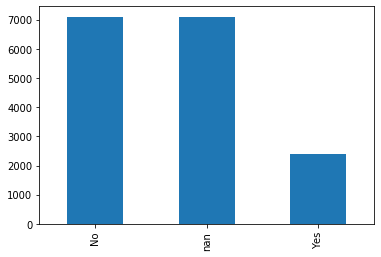

In [10]:
berkeley_business['MINORITY_OWNED'].value_counts(dropna=False).plot(kind='bar')

In [9]:
berkeley_business['MINORITY_OWNED'].value_counts(dropna=False)

No     7099
NaN    7086
Yes    2388
Name: MINORITY_OWNED, dtype: int64

In [11]:
sns.heatmap(berkeley_business)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [12]:
# delete later
import numpy as np

data = []

data.extend(np.random.normal(20,20,10000))

In [10]:
data

[39.465802439439216,
 21.521398618929382,
 9.804395235989174,
 9.446793424172135,
 19.117093121274706,
 54.70616320873522,
 -36.80470073532583,
 34.13554506607838,
 -19.928648941751092,
 32.603352242565165]

In [13]:
np.std(data)

20.056810634170155